#준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/cnnA/CNNproject/cnn_img/')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

#데이터 로드

In [ ]:
import cv2
from PIL import Image 
import glob
import pandas as pd

def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

path = 'shutil/혜령'
filepath = glob.glob(path + '/*')
df = proc_img(filepath)
df.head(5)

,Filepath,Label
0,shutil/혜령/www_552.jpg,혜령
1,shutil/혜령/www_390.jpg,혜령
2,shutil/혜령/www_174.jpg,혜령
3,shutil/혜령/www_252.jpg,혜령
4,shutil/혜령/www_114.jpg,혜령


In [ ]:
filepath_k = glob.glob('shutil/경한' + '/*')
df_k = proc_img(filepath_k)
filepath_y = glob.glob('shutil/연수' + '/*')
df_y = proc_img(filepath_y)
filepath_yr = glob.glob('shutil/유리' + '/*')
df_yr = proc_img(filepath_yr)
filepath_m = glob.glob('shutil/민용' + '/*')
df_m = proc_img(filepath_m)
filepath_w = glob.glob('shutil/원' + '/*')
df_w = proc_img(filepath_w)

df = pd.concat([df, df_k, df_y, df_yr, df_m, df_w], axis=0)
df = df.reset_index()

In [ ]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 858

Number of different labels: 6

Labels: ['혜령' '경한' '연수' '유리' '민용' '원']


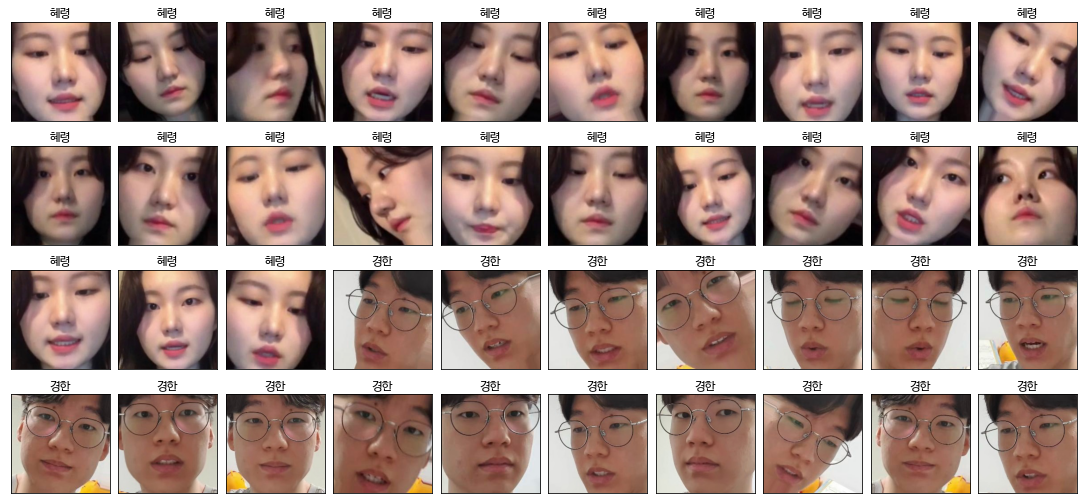

In [ ]:
import matplotlib.pyplot as plt
import cv2


# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i+110]))
    ax.set_title(df.Label[i+110], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

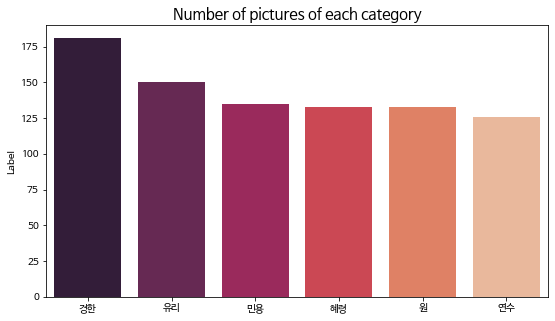

In [ ]:
import seaborn as sns
# 라벨 별 개수 확인
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

## 데이터셋 추가

In [ ]:
import cv2
from PIL import Image 
import glob
import pandas as pd

path = 'face_only/혜령'
filepath = glob.glob(path + '/*')

val_df_h = proc_img(filepath)
val_df_h.head(5)

,Filepath,Label
0,face_only/혜령/new_hyeryung_12.jpg_0_2979.jpg,혜령
1,face_only/혜령/new_hyeryung_0.jpg_0_1010.jpg,혜령
2,face_only/혜령/new_hyeryung_3.jpg_0_7750.jpg,혜령
3,face_only/혜령/new_hyeryung_1.jpg_0_9071.jpg,혜령
4,face_only/혜령/new_hyeryung_0.jpg_0_837.jpg,혜령


In [ ]:
filepath_k = glob.glob('face_only/경한' + '/*')
val_df_k = proc_img(filepath_k)
filepath_y = glob.glob('face_only/연수' + '/*')
val_df_y = proc_img(filepath_y)
filepath_yr = glob.glob('face_only/유리' + '/*')
val_df_yr = proc_img(filepath_yr)
filepath_m = glob.glob('face_only/민용' + '/*')
val_df_m = proc_img(filepath_m)
filepath_w = glob.glob('face_only/원' + '/*')
val_df_w = proc_img(filepath_w)

val_df = pd.concat([val_df_h, val_df_k, val_df_y, val_df_yr, val_df_m, val_df_w], axis=0)
val_df = val_df.reset_index()

In [ ]:
print(f'Number of pictures: {val_df.shape[0]}\n')
print(f'Number of different labels: {len(val_df.Label.unique())}\n')
print(f'Labels: {val_df.Label.unique()}')

Number of pictures: 330

Number of different labels: 6

Labels: ['혜령' '경한' '연수' '유리' '민용' '원']


In [ ]:
# 동영상을 통해 추출한 데이터와 개인 사진 데이터 합치기
df_concat = pd.concat([df,val_df], axis=0)

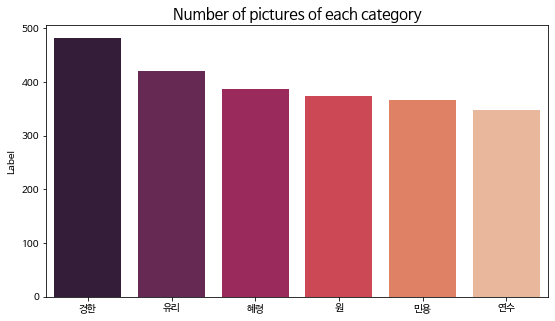

In [ ]:
# 합친 개수 확인
import seaborn as sns

vc = df_concat['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

#데이터 전처리

In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df_concat, test_size=0.05,random_state=10)
train_df.shape,test_df.shape

((1128, 3), (60, 3))

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.15
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label', 
        target_size=(224, 224), 
        color_mode='rgb', 
        class_mode='categorical', 
        batch_size=1,
        shuffle=True, 
        seed=0,
        subset='training', 
        #rotation_range=30, # 회전은 사용하지 않았음
        zoom_range=0.15, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.15, 
        horizontal_flip=True,
        fill_mode="nearest"
            )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=1,
        shuffle=True,
        seed=0,
        subset='validation',
        #rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=1,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

Found 959 validated image filenames belonging to 6 classes.
Found 169 validated image filenames belonging to 6 classes.
Found 60 validated image filenames belonging to 6 classes.




#CNN 모델 설계

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

###model3
model3 = Sequential()

# layer 1
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)))
model3.add(Dropout(0.5))  
model3.add(Conv2D(64, (3, 3), activation='relu', padding= 'same'))
model3.add(Dropout(0.5))
model3.add(MaxPooling2D(pool_size=(2, 2)))

## layer 2
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.5))                                        
model3.add(MaxPooling2D(pool_size=(2, 2)))

## layer 3                         
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.5)) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

## layer 4
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))

# layer 5
model3.add(Dense(512, activation='relu'))

# layer 6
model3.add(Dense(6, activation='softmax'))
    
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#학습

In [ ]:
history = model3.fit(train_images,validation_data=val_images, epochs=10)

In [ ]:
model3.save('model/model3_10.h5')

In [ ]:
def plot_loss_acc(history):
    epoch = history.epoch
    epoch = len(epoch)
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()

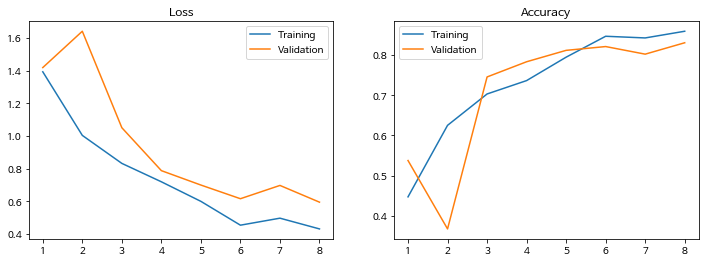

In [ ]:
plot_loss_acc(history)

#test_set에 대한 정확도 확인

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the label of the test_images
pred = model3.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 96.67%


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

          경한       1.00      1.00      1.00        14
          민용       1.00      1.00      1.00         7
          연수       0.90      0.90      0.90        10
           원       1.00      1.00      1.00         7
          유리       0.92      0.92      0.92        13
          혜령       1.00      1.00      1.00         9

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



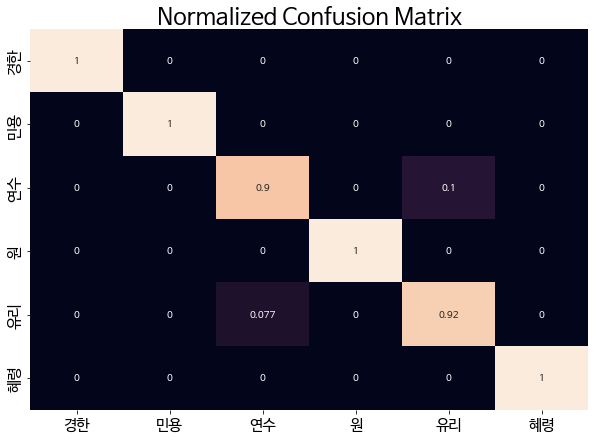

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# 결과 확인
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()

#새로운 이미지로 테스트

In [ ]:
import cv2
from PIL import Image 
import glob
import pandas as pd

path = 'test2/testttt' # 테스트 파일 경로
filepath = glob.glob(path + '/*')

df_t = proc_img(filepath) 
df_t.head(6)

,Filepath,Label
0,test2/testttt/6.JPG,6.JPG
1,test2/testttt/3.JPG,3.JPG
2,test2/testttt/2.JPG,2.JPG
3,test2/testttt/4.JPG,4.JPG
4,test2/testttt/1.JPG,1.JPG
5,test2/testttt/5.JPG,5.JPG


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

In [ ]:
test_images2 = test_generator.flow_from_dataframe(
    dataframe=df_t,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1,
    shuffle=False)

Found 6 validated image filenames belonging to 6 classes.


In [ ]:
# 저장했던 가중치 불러오기
from keras.models import load_model
model3 = load_model('model/cnn_model3_10.h5')

In [ ]:
from sklearn.metrics import accuracy_score

# predict
pred = model3.predict(test_images2)
pred = np.argmax(pred,axis=1)

# label 대입
labels = {0: '경한', 1: '민용', 2: '연수', 3: '원', 4: '유리', 5: '혜령'}
pred = [labels[k] for k in pred]
    
y_test = list(df_t.Label)

In [ ]:
# 결과 확인
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_t.Filepath.iloc[i]))
    ax.set_title(f"Predicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()

#결과 csv 파일로 저장

In [ ]:
from collections import Counter
import csv

In [ ]:
def markAttendance(name):
  with open('Attendance.csv', 'w', newline='') as csv_file:
    counter = dict(Counter(name))
    fieldnames = ['Name', 'Count']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()

    for name, count in counter.items():
        writer.writerow({'Name': name, 'Count': count})

In [ ]:
markAttendance(pred)

In [ ]:
import pandas as pd
df = pd.read_csv('Attendance.csv')
df

,Name,Count
0,연수,1
1,원,1
2,유리,1
3,민용,1
4,혜령,1
5,경한,1
